<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Projeto 9</font>
## <font color='blue'>Análise de Sentimento em Avaliações de Usuários com Regressão Não Paramétrica</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import scipy
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import kstest

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Métodos Não Paramétricos de Regressão

Veja o ebook no Capítulo 23 do curso.

## Carregando e Compreendendo os Dados

In [4]:
# Gerar dados de exemplo
np.random.seed(0)
dia = np.arange(1, 101)

In [5]:
# Vamos gerar um score de sentimento do cliente adicionando ruído, ajustado para variar entre 0 e 10
sentimento = 5 + 3 * np.sin(dia / 10) + np.random.normal(scale = 1.5, size = dia.size)

In [6]:
# Garante que os valores estejam dentro do intervalo [0, 10]
sentimento = np.clip(sentimento, 0, 10)

In [7]:
# Criar DataFrame
dsa_dados = pd.DataFrame({'Dia': dia,
                          'Sentimento': sentimento})

In [8]:
dsa_dados.shape

(100, 2)

In [9]:
dsa_dados.head()

,Dia,Sentimento
0,1,7.945579
1,2,6.196244
2,3,7.354668
3,4,9.529595
4,5,9.239614


In [10]:
dsa_dados.tail()

,Dia,Sentimento
95,96,5.536879
96,97,4.200468
97,98,6.579368
98,99,3.817760
99,100,3.970921


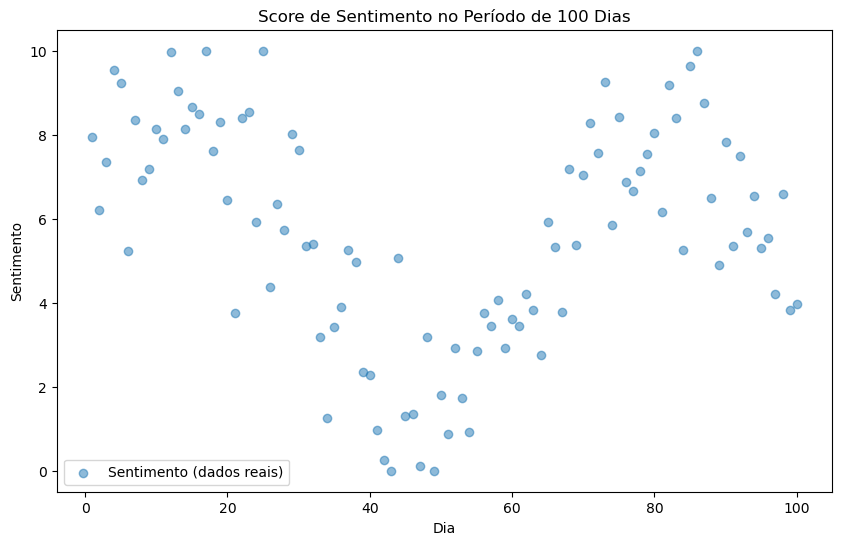

In [11]:
# Plotar os dados
plt.figure(figsize = (10, 6))
plt.scatter(dsa_dados['Dia'], 
            dsa_dados['Sentimento'], 
            alpha = 0.5, 
            label = 'Sentimento (dados reais)')
plt.title('Score de Sentimento no Período de 100 Dias')
plt.xlabel('Dia')
plt.ylabel('Sentimento')
plt.legend()
plt.show()

## Regressão LOESS (Locally Estimated Scatterplot Smoothing)

A regressão LOESS (Locally Estimated Scatterplot Smoothing) é uma técnica de modelagem flexível que não depende de muitas das suposições tradicionais associadas a modelos de regressão paramétrica, como linearidade, homogeneidade da variância e distribuição normal dos erros. No entanto, há algumas verificações que você pode fazer para assegurar que o modelo LOESS está fornecendo uma representação adequada dos dados, como veremos a seguir.

https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

Há duas opções:

- Locally Estimated Scatterplot Smoothing (LOESS)
- Locally Weighted Scatterplot Smoothing (LOWESS)

In [12]:
# Aplicar regressão LOESS
frac = 0.1  # Fração dos dados usados na janela local
dados_loess = lowess(dsa_dados['Sentimento'], dsa_dados['Dia'], frac = frac)

In [13]:
# Converter o resultado para DataFrame
dados_loess_df = pd.DataFrame(data = dados_loess, columns = ['Dia', 'Sentimento_ajustado'])

In [14]:
# Extrair valores ajustados
y_fitted = dados_loess[:, 1]

In [15]:
# Calcular resíduos
residuais = dsa_dados['Sentimento'] - y_fitted

In [16]:
residuais

0     0.449593
1    -1.432620
2    -0.366219
3     1.752781
4     1.377636
        ...   
95    0.169855
96   -0.827992
97    1.885634
98   -0.550364
99   -0.068607
Name: Sentimento, Length: 100, dtype: float64

## Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov (K-S) é tipicamente usado para comparar uma amostra de dados com uma distribuição teórica ou para comparar duas amostras de dados entre si, com o objetivo de testar se elas vêm da mesma distribuição. Embora o teste K-S não seja diretamente usado para validar a aplicação de uma regressão LOESS, ele pode ser útil para verificar as suposições sobre a distribuição dos resíduos de um modelo de regressão. No contexto de uma regressão LOESS, você pode usar o Teste de Kolmogorov-Smirnov para avaliar se os resíduos do modelo seguem uma distribuição normal, o que é uma boa prática na análise de resíduos de regressão, apesar de a regressão LOESS em si não exigir essa suposição.

O Teste de Kolmogorov-Smirnov é um teste não paramétrico. 

In [17]:
# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(residuais, 'norm', args = (residuais.mean(), residuais.std()))

In [18]:
print(f"Estatística de teste: {ks_statistic}")
print(f"P-valor: {p_value}")

Estatística de teste: 0.05901734853871826
P-valor: 0.8564874083539019


In [19]:
# Interpretação
if p_value < 0.05:
    print("Os resíduos não seguem uma distribuição normal.")
else:
    print("Não há evidência suficiente para rejeitar a hipótese de que os resíduos seguem uma distribuição normal.")

Não há evidência suficiente para rejeitar a hipótese de que os resíduos seguem uma distribuição normal.


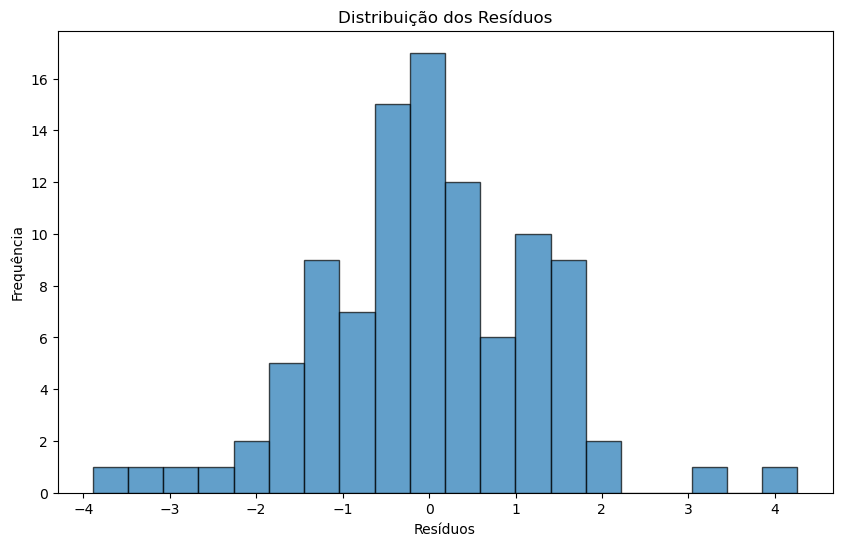

In [20]:
# Visualizar os resíduos
plt.figure(figsize = (10, 6))
plt.hist(residuais, bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

## Visualização do Ajuste do Modelo

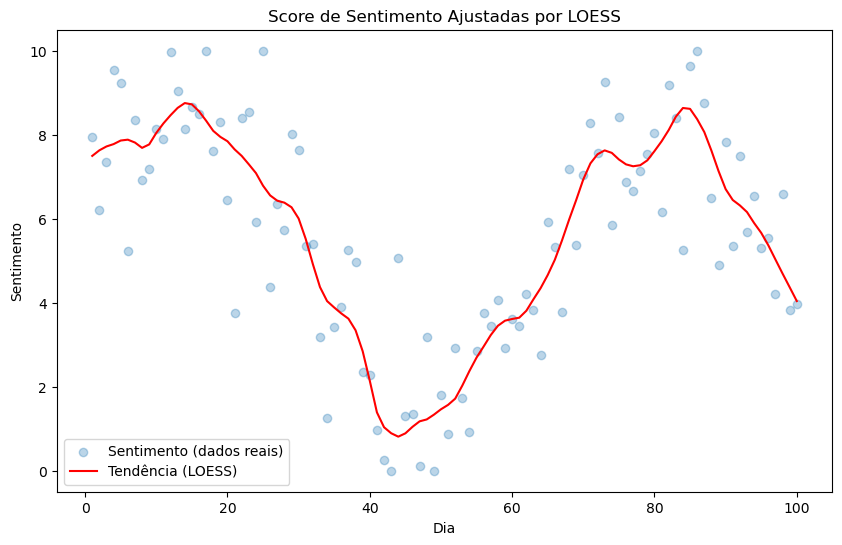

In [21]:
# Plotar os dados ajustados com LOESS
plt.figure(figsize = (10, 6))
plt.scatter(dsa_dados['Dia'], dsa_dados['Sentimento'], alpha = 0.3, label = 'Sentimento (dados reais)')
plt.plot(dados_loess_df['Dia'], dados_loess_df['Sentimento_ajustado'], color = 'red', label = 'Tendência (LOESS)')
plt.title('Score de Sentimento Ajustadas por LOESS')
plt.xlabel('Dia')
plt.ylabel('Sentimento')
plt.legend()
plt.show()

## Deploy e Uso do Modelo

In [22]:
# Vamos prever o sentimento para o dia 105, extrapolando a tendência
dia_novo = 105

In [23]:
# Extraindo a previsão
sentimento_novo = np.interp(dia_novo, dados_loess_df['Dia'], dados_loess_df['Sentimento_ajustado'])

In [24]:
print(f'O score de sentimento estimado para o dia {dia_novo} é {sentimento_novo:.2f}')

O score de sentimento estimado para o dia 105 é 4.04


In [25]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [26]:
#%watermark -v -m

In [27]:
#%watermark --iversions

# Fim